# Problem Statement

As a consultant for an online retail store, the task is to review their data and provide valuable insights to the CEO and CMO to help them strategically plan for the upcoming year. The goal is to analyze the data and identify the major factors that contribute to the company's revenue, so the management team can focus on and invest in areas that are performing well. By leveraging data analytics and providing valuable insights, the management team can make informed decisions that will help the business grow and succeed in the long term.

**InvoiceNo**:Unique Invoice ID assigned to every distinct item

**StockCode**:Unique identifier assigned to each product

**Description**:Describe the product name

**Quantity**: Quantity of each product

**InvoiceDate**: Date of Invoice

**UnitPrice**:Price of each product

**CustomerID**:Unique identifier assigned to each customer

**Country**:Country name

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,PowerTransformer,StandardScaler,MinMaxScaler,RobustScaler
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# Data Preparation

**Understand the Data**

#### Read the dataset and print the first five observations.

In [2]:
df_Tata = pd.read_excel(r"C:\Users\INDHUJA\Downloads\CAPSTON PROJECT\TATA\Tata_set.xlsx")
df_Tata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df_Tata.shape

(541909, 8)

As we can see that their are 541909 rows and 8 columns in the above dataset.

In [4]:
df_Tata.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

As per the above details their are 4 categorical columns, 3 numerical columns and 1 datetime column

In [5]:
df_Tata['CustomerID']=df_Tata['CustomerID'].astype(object)

We change the datatype of customerID to object.

**Check the duplicate values**

In [6]:
df_Tata.duplicated().sum()

5268

Their are 5268 rows are duplicated. We need to drop the duplicated columns.

In [7]:
df_Tata=df_Tata.drop_duplicates()

In [8]:
df_Tata.duplicated().sum()

0

In [13]:
df_Tata.shape

(10587, 8)

**Check 5-summery**

In [10]:
df_Tata.describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Range: The range of values in the "Quantity" column is quite large, with a minimum of -80,995 and a maximum of 80,995. This suggests a wide variation in the quantities recorded. On the other hand, the range of values in the "UnitPrice" column is not provided in the summary statistics.

Distribution: The summary statistics indicate that both columns have a positive mean value. The mean quantity is approximately 9.62, while the mean unit price is around 4.63. However, without additional information on the distribution, it's challenging to determine the specific shape or skewness of the data.

Spread: The standard deviation for the "Quantity" column is relatively high at approximately 219.13, indicating a large dispersion of values around the mean. The standard deviation for the "UnitPrice" column is approximately 97.23, suggesting a considerable spread in the unit prices as well.

Outliers: The presence of negative values in both columns is noteworthy. The minimum quantity of -80,995 and the minimum unit price of -11,062.06 might indicate some anomalies or errors in the data, as it's uncommon to have negative quantities or prices.

Quartiles: Looking at the quartiles, we can observe that 25% of the data points in both columns have a value of 1 or lower. The median for the "Quantity" column is 3, indicating that half of the data points have a quantity of 3 or lower. The median for the "UnitPrice" column is 2.08, suggesting that half of the data points have a unit price of 2.08 or lower.

In [11]:
df_Tata.describe(include='object')

,InvoiceNo,StockCode,Description,CustomerID,Country
count,536641,536641,535187,401604.0,536641
unique,25900,4070,4223,4372.0,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0,United Kingdom
freq,1114,2301,2357,7812.0,490300


Here we can see the null values in customerID and Desscription columns.

*Removed Rows in the Quantity column showing negative numbers or below 1*

In [12]:
# Filter rows with negative numbers or values below 1 in Quantity column
df_Tata = df_Tata[(df_Tata['Quantity'] < 0) | (df_Tata['Quantity'] < 1)]

# View the filtered rows
print(df_Tata)


       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice CustomerID         Country  
141    2010-12-01 09:41:00      27.50    145

**Missing value treatment**

In [14]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total=df_Tata.isnull().sum().sort_values(ascending=False)
# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_Tata.isnull().sum()*100/df_Tata.isnull().count()).sort_values(ascending=False) 
# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
CustomerID,135037,25.163377
Description,1454,0.270945
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


Here we can see some missing values in CustomerID and Description columns.We need to replace both columns

In [11]:
# Find the mode of the "customerID" column
mode_customerID = df_Tata['CustomerID'].mode()[0]

# Replace null values with the mode of the "customerID" column
df_Tata['CustomerID'].fillna(mode_customerID, inplace=True)

# Print the updated DataFrame
print(mode_customerID)

17841.0


Here i am replace the null values of customerId column with mode.

We need to replace the Description column by using StockCode

In [12]:
new_col=df_Tata.groupby('StockCode')['Description'].value_counts().to_frame().rename(columns={'Description':'count'}).reset_index()
new_col

,StockCode,Description,count
0,10002,INFLATABLE POLITICAL GLOBE,71
1,10080,GROOVY CACTUS INFLATABLE,22
2,10080,check,1
3,10120,DOGGY RUBBER,29
4,10125,MINI FUNKY DESIGN TAPES,93
...,...,...,...
4787,gift_0001_20,to push order througha s stock was,1
4788,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,7
4789,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,3
4790,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,4


In [13]:
df_Tata['Description'].fillna('Missing',inplace=True)
df_Tata[df_Tata['Description']=='Missing']['Description'].replace('Missing','missed')

622       missed
1970      missed
1971      missed
1972      missed
1987      missed
           ...  
535322    missed
535326    missed
535332    missed
536981    missed
538554    missed
Name: Description, Length: 1455, dtype: object

First we replace the nullvalues by using missing values

In [14]:
for i,j in enumerate(df_Tata['Description']):
    if j=='missed':
        df_Tata.loc[i,'Description'] =  df_Tata.loc[i,'ndf']

In [15]:
df_Tata[df_Tata['Description']=='Missing']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,Missing,56,2010-12-01 11:52:00,0.0,17841.0,United Kingdom
1970,536545,21134,Missing,1,2010-12-01 14:32:00,0.0,17841.0,United Kingdom
1971,536546,22145,Missing,1,2010-12-01 14:33:00,0.0,17841.0,United Kingdom
1972,536547,37509,Missing,1,2010-12-01 14:33:00,0.0,17841.0,United Kingdom
1987,536549,85226A,Missing,1,2010-12-01 14:34:00,0.0,17841.0,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,Missing,-2,2011-12-07 18:26:00,0.0,17841.0,United Kingdom
535326,581203,23406,Missing,15,2011-12-07 18:31:00,0.0,17841.0,United Kingdom
535332,581209,21620,Missing,6,2011-12-07 18:35:00,0.0,17841.0,United Kingdom
536981,581234,72817,Missing,27,2011-12-08 10:33:00,0.0,17841.0,United Kingdom


We need to replace the missing values in Description column with Stockcode by using Map function

In [16]:
mapping=new_col.groupby('StockCode')[['StockCode','Description']].head(1).set_index('StockCode').to_dict()
mapping

{'Description': {10002: 'INFLATABLE POLITICAL GLOBE ',
  10080: 'GROOVY CACTUS INFLATABLE',
  10120: 'DOGGY RUBBER',
  10125: 'MINI FUNKY DESIGN TAPES',
  10133: 'COLOURING PENCILS BROWN TUBE',
  10135: 'COLOURING PENCILS BROWN TUBE',
  11001: 'ASSTD DESIGN RACING CAR PEN',
  15030: 'FAN BLACK FRAME ',
  15034: 'PAPER POCKET TRAVELING FAN ',
  15036: 'ASSORTED COLOURS SILK FAN',
  15039: 'SANDALWOOD FAN',
  16008: 'SMALL FOLDING SCISSOR(POINTED EDGE)',
  16010: 'FOLDING CAMPING SCISSOR W/KNIF & S',
  16011: 'ANIMAL STICKERS',
  16012: 'FOOD/DRINK SPONGE STICKERS',
  16014: 'SMALL CHINESE STYLE SCISSOR',
  16015: 'MEDIUM CHINESE STYLE SCISSOR',
  16016: 'LARGE CHINESE STYLE SCISSOR',
  16033: 'MINI HIGHLIGHTER PENS',
  16043: 'POP ART PUSH DOWN RUBBER ',
  16045: 'POPART WOODEN PENCILS ASST',
  16046: 'TEATIME PEN CASE & PENS',
  16048: 'TEATIME ROUND PENCIL SHARPENER ',
  16049: 'TEATIME GEL PENS ASST',
  16052: 'TEATIME PUSH DOWN RUBBER',
  16054: 'POPART RECT PENCIL SHARPENER ASST',


Now we need to add the replaced column to dataset

In [17]:
df_Tata['ndf']=df_Tata['StockCode'].map(mapping["Description"])
df_Tata.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
ndf            112
dtype: int64

Now we need to drop the ndf column.

In [18]:
df_Tata.drop('ndf',axis=1,inplace=True)

**Outlier Analysis and Treatment**

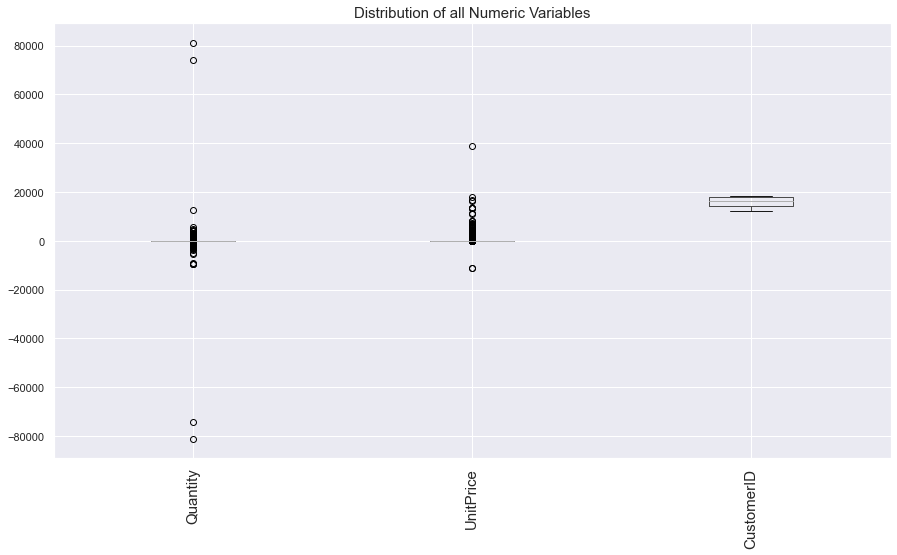

In [19]:
# set the plot size using figure()
sns.set()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df_Tata.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

Before handling the outlier we need to confirm its outliers or not

In [21]:
# Calculate the Z-scores for the "Quantity" and "UnitPrice" columns
z_scores = np.abs((df_Tata[['Quantity', 'UnitPrice']] - df_Tata[['Quantity', 'UnitPrice']].mean()) / df_Tata[['Quantity', 'UnitPrice']].std())

# Define a threshold for outliers
threshold = 3

# Get the indices of the outliers
outlier_indices = np.where(z_scores > threshold)

# Get the outliers with their corresponding "Description"
outliers = df_Tata.iloc[outlier_indices[0], :]

# Print the outliers
print(outliers[['Description', 'Quantity', 'UnitPrice']])

                                Description  Quantity  UnitPrice
1814                         DOTCOM POSTAGE         1     569.77
3041                         DOTCOM POSTAGE         1     607.49
4287    ROTATING SILVER ANGELS T-LIGHT HLDR     -9360       0.03
4850         ASSORTED COLOUR T-LIGHT HOLDER      1824       0.55
4945      WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880       0.18
...                                     ...       ...        ...
540071                       POPCORN HOLDER      1200       0.72
540421          PAPER CRAFT , LITTLE BIRDIE     80995       2.08
540422          PAPER CRAFT , LITTLE BIRDIE    -80995       2.08
540908                       DOTCOM POSTAGE         1     933.17
541540                       DOTCOM POSTAGE         1    1714.17

[704 rows x 3 columns]


In [22]:
# As per the above result we can assume that it is not consider as an outlier. 

**Drop unwanted columns** 

In [23]:
# Use the drop() method to remove the CustomerID, InvoiceDate, and InvoiceNo columns
df_Tata= df_Tata.drop(['CustomerID', 'InvoiceDate'], axis=1)

# Verify that the columns have been removed
print(df_Tata.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   UnitPrice         Country  
0       2.55  United Kingdom  
1       3.39  United Kingdom  
2       2.75  United Kingdom  
3       3.39  United Kingdom  
4       3.39  United Kingdom  


In [20]:
df_Tata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#  Distribution of Variables

**Create a target variable**

In [21]:
# Create a revenue column by multiplying Quantity and UnitPrice
df_Tata['Revenue'] = df_Tata['Quantity'] * df_Tata['UnitPrice']

# Group the data by InvoiceNo and sum the revenue for each invoice
revenue_by_invoice = df_Tata.groupby('InvoiceNo')['Revenue'].sum()

# Assign the revenue by invoice back to the original data
df_Tata = df_Tata.join(revenue_by_invoice, on='InvoiceNo', rsuffix='_total')
df_Tata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Revenue_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,139.12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,139.12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,139.12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,139.12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,139.12


**Plot the boxplot of the target (dependent) variable 'Revenue_total'.**

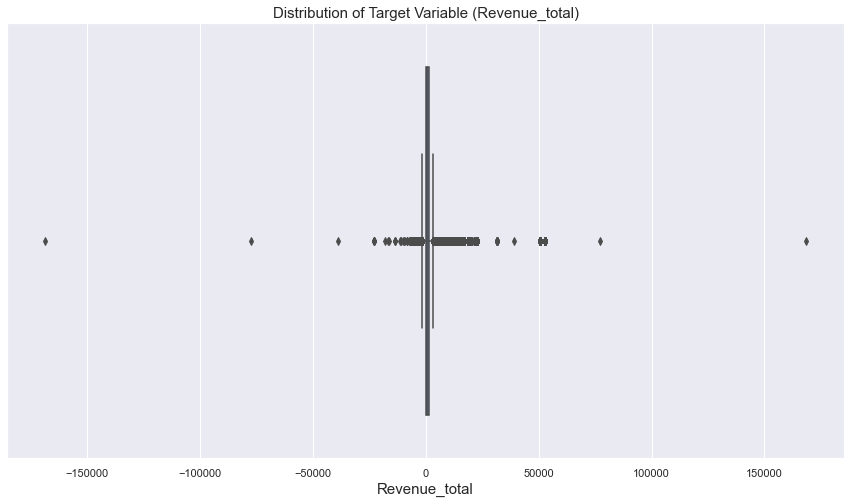

In [22]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot boxplot for 'Total_Compensation' using seaborn library
sns.boxplot(df_Tata['Revenue_total'])

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Revenue_total)', fontsize = 15)
plt.xlabel('Revenue_total', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that all the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

Let us use the IQR method to remove the outliers.

In [23]:

# Calculate the IQR value for the 'UnitPrice' column
Q1 = df_Tata['Revenue_total'].quantile(0.25)
Q3 = df_Tata['Revenue_total'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Identify the outliers in the 'UnitPrice' column
outliers = df_Tata[(df_Tata['Revenue_total'] < lower_bound) | (df_Tata['Revenue_total'] > upper_bound)]

# Impute the outliers with the median value of the 'UnitPrice' column
median = df_Tata['Revenue_total'].median()
df_Tata.loc[(df_Tata['Revenue_total'] < lower_bound) | (df_Tata['Revenue_total'] > upper_bound), 'Revenue_total'] = median
df_Tata.shape

(536641, 10)

**Interpretation** We can see there is no change in observations.That means outliers are not removed.

**Distribution of numeric independent variables.**

<Figure size 1440x864 with 0 Axes>

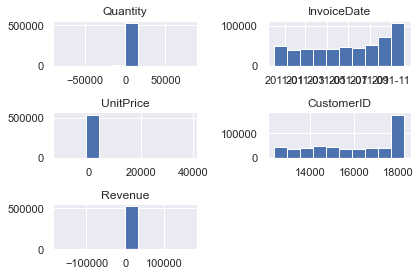

Skewness:


Quantity       -0.263921
UnitPrice     185.600448
CustomerID     -0.401061
Revenue        -0.960734
dtype: float64

In [24]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
plt.figure(figsize=(20,12))
df_Tata.drop('Revenue_total', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_Tata.drop('Revenue_total', axis = 1).skew()

**Distribution of categoric independent variable.**

In [25]:
# Get the list of all categorical columns
cat_cols = df_Tata.select_dtypes(include=['object']).columns.tolist()
cat_cols


['InvoiceNo', 'StockCode', 'Description', 'Country']

In [27]:
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

In [ ]:
plt.figure(figsize=(15,25),dpi=100)
n=1
for i in cat_cols:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.countplot(df_Tata[i] ,palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

In [ ]:
## **Bivariate Analysis**

In [ ]:
### Bivariate Analysis on Categorical - Categorical

In [ ]:
plt.figure(figsize=(15,30),dpi=100)
n=1
for i in cat_col:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.countplot(df_Tata[i],hue= df_Tata ['Revenue_total'] ,palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot) 